## Kaggle Input 

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/emnist/emnist-letters-mapping.txt
/kaggle/input/emnist/emnist-letters-test.csv
/kaggle/input/emnist/emnist-mnist-mapping.txt
/kaggle/input/emnist/emnist-digits-train.csv
/kaggle/input/emnist/emnist-bymerge-mapping.txt
/kaggle/input/emnist/emnist-balanced-train.csv
/kaggle/input/emnist/emnist-digits-test.csv
/kaggle/input/emnist/emnist-balanced-test.csv
/kaggle/input/emnist/emnist-mnist-test.csv
/kaggle/input/emnist/emnist-letters-train.csv
/kaggle/input/emnist/emnist-byclass-train.csv
/kaggle/input/emnist/emnist-bymerge-test.csv
/kaggle/input/emnist/emnist-balanced-mapping.txt
/kaggle/input/emnist/emnist-mnist-train.csv
/kaggle/input/emnist/emnist-digits-mapping.txt
/kaggle/input/emnist/emnist-bymerge-train.csv
/kaggle/input/emnist/emnist-byclass-test.csv
/kaggle/input/emnist/emnist-byclass-mapping.txt
/kaggle/input/emnist/emnist_source_files/emnist-digits-test-labels-idx1-ubyte
/kaggle/input/emnist/emnist_source_files/emnist-bymerge-train-labels-idx1-ubyte
/kaggle/input/

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Dense,Dropout,MaxPooling2D,Conv2D
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

## Label Map

In [3]:
label_map = pd.read_csv("/kaggle/input/emnist/emnist-letters-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0,
                        usecols=[0,1],
                        header=None).squeeze("columns")

label_map.head(5)

0
1    65
2    66
3    67
4    68
5    69
Name: 1, dtype: int64

In [4]:
label_dict = {}

for index, label in enumerate(label_map):
    label_dict[index+1] = chr(label)

label_dict

{1: 'A',
 2: 'B',
 3: 'C',
 4: 'D',
 5: 'E',
 6: 'F',
 7: 'G',
 8: 'H',
 9: 'I',
 10: 'J',
 11: 'K',
 12: 'L',
 13: 'M',
 14: 'N',
 15: 'O',
 16: 'P',
 17: 'Q',
 18: 'R',
 19: 'S',
 20: 'T',
 21: 'U',
 22: 'V',
 23: 'W',
 24: 'X',
 25: 'Y',
 26: 'Z'}

## EMNIST LETTERS Dataset

In [5]:
emnist_test = pd.read_csv('/kaggle/input/emnist/emnist-letters-test.csv')
emnist_train = pd.read_csv('/kaggle/input/emnist/emnist-letters-train.csv')

In [6]:
print(emnist_train.shape)
print(emnist_test.shape)

(88799, 785)
(14799, 785)


In [7]:
#training_letters
emnist_train_y = np.array(emnist_train.iloc[:,0].values)
emnist_train_x = np.array(emnist_train.iloc[:,1:].values)
#testing_labels
emnist_test_y = np.array(emnist_test.iloc[:,0].values)
emnist_test_x = np.array(emnist_test.iloc[:,1:].values)
print(emnist_train_y.shape)
print(emnist_train_x.shape)
print(emnist_train_y.shape)

(88799,)
(88799, 784)
(88799,)


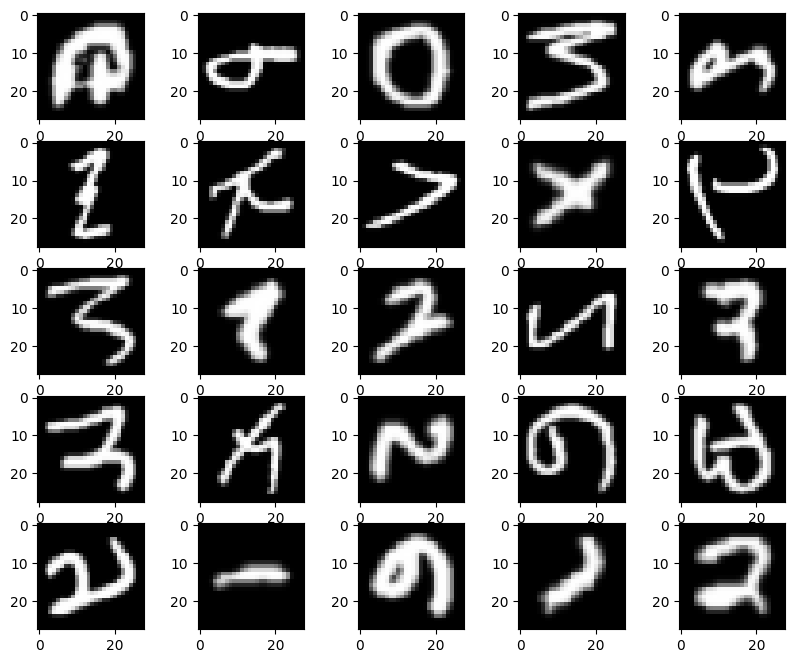

In [8]:
fig,axes = plt.subplots(5,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(emnist_train_x[i].reshape([28,28]), cmap=plt.cm.gray)

In [9]:
def reshape(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    return image

In [10]:
def flip_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [11]:
sample_image = emnist_train_x[1000]
sample_label = emnist_train_y[1000]
sample_image.shape, sample_label

((784,), 23)

Label entry No. 1000: W


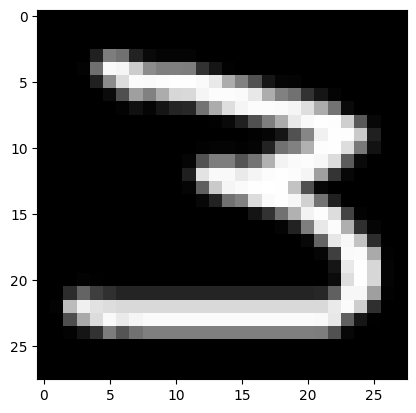

In [12]:
#Init Height and Weight
W = 28
H = 28

print("Label entry No. 1000:", label_dict[sample_label])
plt.imshow(sample_image.reshape(W, H), cmap=plt.cm.gray)
plt.show()

Label entry 1000: W


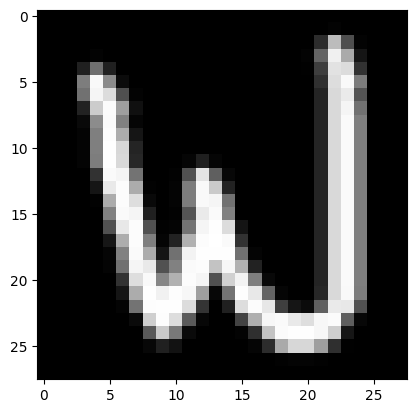

In [13]:
print("Label entry 1000:", label_dict[sample_label])
plt.imshow(flip_and_rotate(sample_image), cmap=plt.cm.gray)
plt.show()

In [14]:
emnist_train_x = np.apply_along_axis(flip_and_rotate, 1, emnist_train_x)
emnist_train_x.shape

(88799, 28, 28)

In [15]:
emnist_test_x = np.apply_along_axis(flip_and_rotate, 1, emnist_test_x)
emnist_test_x.shape

(14799, 28, 28)

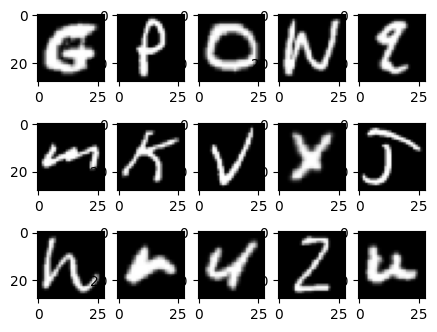

In [16]:
fig,axes = plt.subplots(3,5,figsize=(5,4))
for i,ax in enumerate(axes.flat):
    ax.imshow(emnist_train_x[i].reshape([28,28]), cmap=plt.cm.gray)

## Digital Letters

In [17]:
digital_letters = pd.read_csv('/kaggle/input/digital-letters/digital_letters.csv')
digital_letters_alt = pd.read_csv('/kaggle/input/digital-letters/digital_letters_alt.csv')

In [18]:
diglet_y = np.array(digital_letters.iloc[:,-1].values)
diglet_x = np.array(digital_letters.iloc[:,1:-1].values)
diglet_alt_y = np.array(digital_letters_alt.iloc[:,-1].values)
diglet_alt_x = np.array(digital_letters_alt.iloc[:,1:-1].values)
print(diglet_y.shape)
print(diglet_x.shape)
print(diglet_alt_y.shape)
print(diglet_alt_x.shape)

(13130,)
(13130, 784)
(7800,)
(7800, 784)


In [19]:
diglet_y[:20]

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T'], dtype=object)

In [20]:
for i in range(len(diglet_y)):
    if diglet_y[i] in label_dict.values():
        for key, value in label_dict.items():
            if value == diglet_y[i]:
                diglet_y[i] = key
                break
                
for i in range(len(diglet_alt_y)):
    if diglet_alt_y[i] in label_dict.values():
        for key, value in label_dict.items():
            if value == diglet_alt_y[i]:
                diglet_alt_y[i] = key
                break

In [21]:
diglet_y[:20]

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20], dtype=object)

In [22]:
diglet_alt_y[:20]

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20], dtype=object)

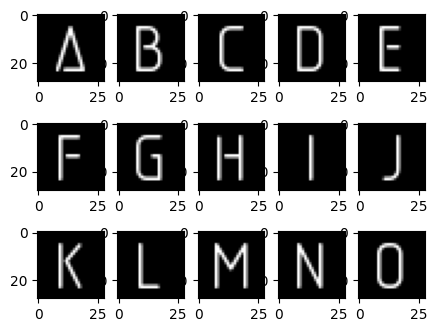

In [23]:
fig,axes = plt.subplots(3,5,figsize=(5,4))
for i,ax in enumerate(axes.flat):
    ax.imshow(diglet_x[i].reshape([28,28]), cmap=plt.cm.gray)

In [24]:
diglet_train_x, diglet_test_x, diglet_train_y, diglet_test_y = train_test_split(diglet_x, diglet_y,  random_state=119)
print(diglet_train_x.shape)
print(diglet_train_y.shape)
print(diglet_test_x.shape)
print(diglet_test_y.shape)

(9847, 784)
(9847,)
(3283, 784)
(3283,)


In [25]:
diglet_alt_train_x, diglet_alt_test_x, diglet_alt_train_y, diglet_alt_test_y = train_test_split(diglet_alt_x, diglet_alt_y,  random_state=119)
print(diglet_alt_train_x.shape)
print(diglet_alt_train_y.shape)
print(diglet_alt_test_x.shape)
print(diglet_alt_test_y.shape)

(5850, 784)
(5850,)
(1950, 784)
(1950,)


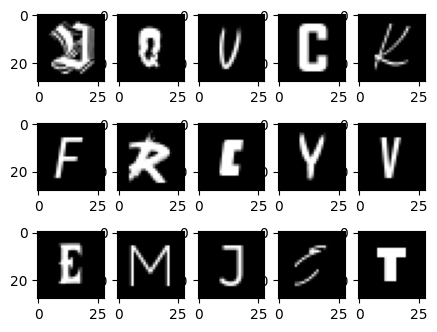

In [26]:
fig,axes = plt.subplots(3,5,figsize=(5,4))
for i,ax in enumerate(axes.flat):
    ax.imshow(diglet_train_x[i].reshape([28,28]), cmap=plt.cm.gray)

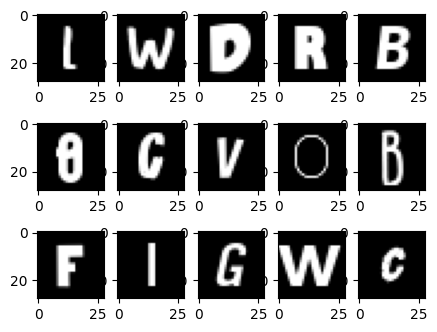

In [27]:
fig,axes = plt.subplots(3,5,figsize=(5,4))
for i,ax in enumerate(axes.flat):
    ax.imshow(diglet_alt_train_x[i].reshape([28,28]), cmap=plt.cm.gray)

## Image Examples

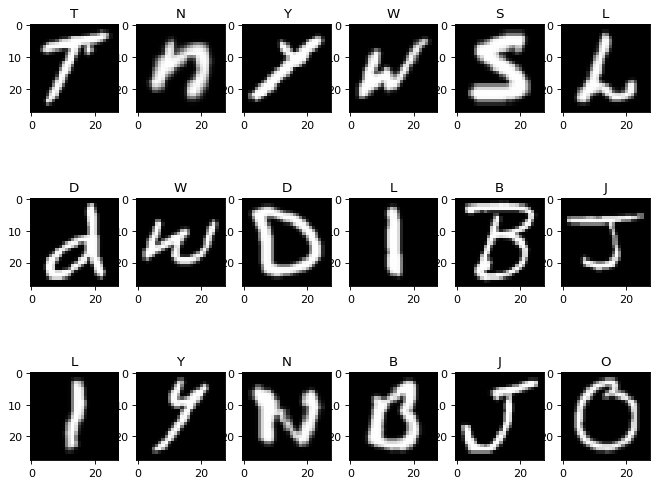

In [28]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(200, 218):
    plt.subplot(3,6,i-199)
    plt.imshow(emnist_train_x[i], cmap=plt.cm.gray)
    plt.title(label_dict[emnist_train_y[i]])

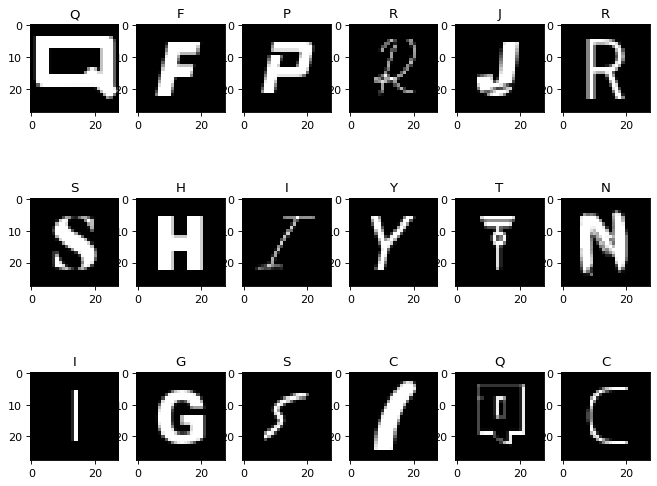

In [29]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(200, 218):
    plt.subplot(3,6,i-199)
    plt.imshow(diglet_train_x[i].reshape([28,28]), cmap=plt.cm.gray)
    plt.title(label_dict[diglet_train_y[i]])

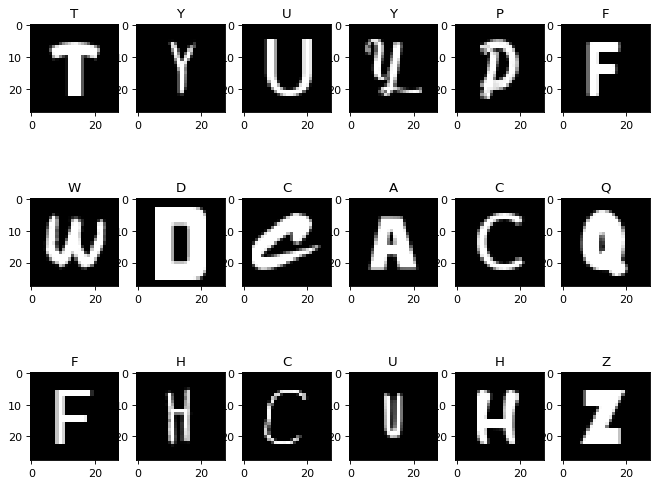

In [30]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(200, 218):
    plt.subplot(3,6,i-199)
    plt.imshow(diglet_alt_train_x[i].reshape([28,28]), cmap=plt.cm.gray)
    plt.title(label_dict[diglet_alt_train_y[i]])

## Combined Dataset

In [31]:
print(emnist_train_x.shape)
print(diglet_train_x.shape)

(88799, 28, 28)
(9847, 784)


In [32]:
diglet_train_x = np.apply_along_axis(reshape, 1, diglet_train_x)
diglet_alt_train_x = np.apply_along_axis(reshape, 1, diglet_alt_train_x)
diglet_test_x = np.apply_along_axis(reshape, 1, diglet_test_x)
diglet_alt_test_x = np.apply_along_axis(reshape, 1, diglet_alt_test_x)

print(diglet_train_x.shape)
print(diglet_alt_train_x.shape)

(9847, 28, 28)
(5850, 28, 28)


In [33]:
train_images = np.vstack([emnist_train_x, diglet_alt_train_x])
train_labels = np.hstack([emnist_train_y, diglet_alt_train_y])

print(train_images.shape)
print(train_labels.shape)

(94649, 28, 28)
(94649,)


In [34]:
test_images = np.vstack([emnist_test_x, diglet_alt_test_x])
test_labels = np.hstack([emnist_test_y, diglet_alt_test_y])

print(test_images.shape)
print(test_labels.shape)

(16749, 28, 28)
(16749,)


# Preprocesssing

In [35]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [36]:
number_of_classes = 37

train_labels = tf.keras.utils.to_categorical(train_labels, number_of_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, number_of_classes)

## Data Augmentation

In [37]:
img_gen = ImageDataGenerator(
rotation_range=10,
zoom_range=0.05,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.15,
horizontal_flip=False,
fill_mode="nearest")

# Lets create a CNN for the classification of these random images.

In [38]:
#train_x,test_x,train_y,test_y = train_test_split(train_images,train_labels,test_size=0.2,random_state=119)

In [39]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,(4,4),input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [40]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

In [41]:
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_acc',mode='max')
ES = EarlyStopping(monitor='val_acc',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [42]:
history = model.fit(
    #img_gen.flow(train_images, train_labels),
    train_images, train_labels,
    epochs=20,
    validation_data=(test_images,test_labels),
    callbacks=[MCP,ES,RLP]
)

Epoch 1/20
2958/2958 [==============================] - ETA: 0s - loss: 0.4609 - acc: 0.8547
Epoch 1: val_acc improved from -inf to 0.90340, saving model to Best_points.h5
2958/2958 [==============================] - 57s 19ms/step - loss: 0.4609 - acc: 0.8547 - val_loss: 0.3086 - val_acc: 0.9034 - lr: 0.0010
Epoch 2/20
   7/2958 [..............................] - ETA: 52s - loss: 0.2950 - acc: 0.9152

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2956/2958 [============================>.] - ETA: 0s - loss: 0.2583 - acc: 0.9164
Epoch 2: val_acc improved from 0.90340 to 0.91289, saving model to Best_points.h5
2958/2958 [==============================] - 55s 19ms/step - loss: 0.2582 - acc: 0.9164 - val_loss: 0.2804 - val_acc: 0.9129 - lr: 0.0010
Epoch 3/20
2956/2958 [============================>.] - ETA: 0s - loss: 0.2291 - acc: 0.9269
Epoch 3: val_acc did not improve from 0.91289
2958/2958 [==============================] - 57s 19ms/step - loss: 0.2293 - acc: 0.9268 - val_loss: 0.2904 - val_acc: 0.9073 - lr: 0.0010
Epoch 4/20
2956/2958 [============================>.] - ETA: 0s - loss: 0.2194 - acc: 0.9309
Epoch 4: val_acc did not improve from 0.91289
2958/2958 [==============================] - 54s 18ms/step - loss: 0.2194 - acc: 0.9309 - val_loss: 0.3354 - val_acc: 0.9030 - lr: 0.0010
Epoch 5/20
2957/2958 [============================>.] - ETA: 0s - loss: 0.2151 - acc: 0.9337
Epoch 5: val_acc did not improve from 0.91289
2958/

## Let's plot Accuracy vs Val_Accuracy to further evaluation..

In [43]:
import seaborn as sns

Text(0, 0.5, 'Accuracy')

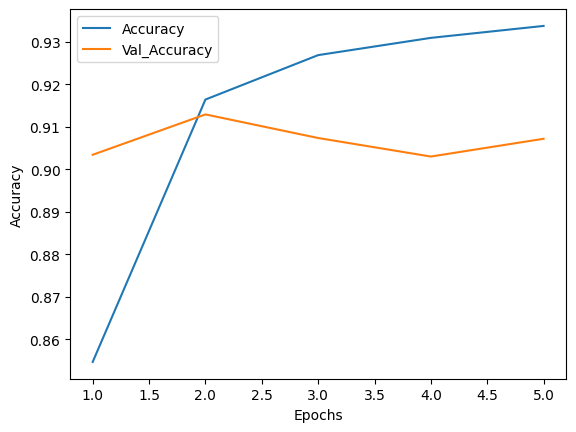

In [44]:
q = len(history.history['acc'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['acc'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_acc'], label='Val_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [45]:
test_acc = model.evaluate(test_images, test_labels)
print('Loss value is ',test_acc[0])
print('Accuracy value is ',test_acc[1])

524/524 [==============================] - 4s 7ms/step - loss: 0.2804 - acc: 0.9129
Loss value is  0.28043878078460693
Accuracy value is  0.9128903150558472


In [46]:
#Prediction
pred_test = model.predict(test_images)
# Finding shape
pred_test.shape

524/524 [==============================] - 4s 7ms/step


(16749, 37)

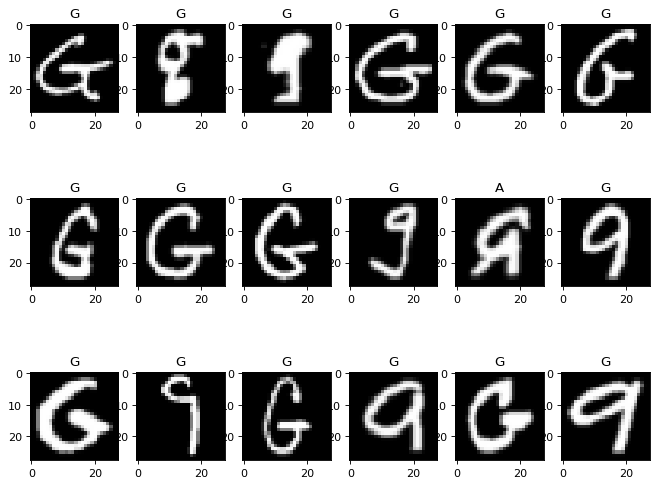

In [59]:
# Visualising some predicted values

plt.figure(figsize=(10, 8), dpi=80)
for i in range(5200, 5218):
    plt.subplot(3,6,i-5199)
    plt.imshow(test_images[i].reshape([28,28]), cmap=plt.cm.gray)
    plt.title(label_dict[pred_test[i].argmax()])

## Test Model

In [48]:
from tensorflow.keras.models import load_model

In [49]:
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/working/Best_points.h5


In [50]:
ocr = load_model('/kaggle/working/Best_points.h5')

### Preprocessing

In [51]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=7098049a419806ae0c249cf5e73b107d0d5333928a7045277f59cfa9cb0df816
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [52]:
import cv2
import imutils 

In [53]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [132]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 30, 150)
    
    # find contours - external only
    countours, hier = cv2.findContours(edged.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    # create an empty mask
    mask = np.zeros(edged.shape[:2],dtype=np.uint8)
    # draw filled boundingrects if the contour is large enough
    for c in countours:
        if cv2.contourArea(c):
            x,y,w,h  = cv2.boundingRect(c)
            cv2.rectangle(mask,(x,y),(x+w,y+h),(255),-1)

    # find the contours on the mask (with solid drawn shapes) and draw outline on input image
    cnts= cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    # show image
    plt.imshow(edged)

    
#     cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    print(len(cnts))
    # loop over the contours
    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        print(x, y, w, h)
        if (w >= 5) and (h >= 15):
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            roi = gray[y:y + h, x:x + w]
            thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            thresh = cv2.resize(thresh, (28, 28), interpolation = cv2.INTER_CUBIC)
            thresh = thresh.astype("float32") / 255.0
            thresh = np.expand_dims(thresh, axis=-1)
            thresh = thresh.reshape(1,28,28,1)
            ypred = model.predict(thresh)
            [x] = label_dict[ypred.argmax()]
            letters.append(x)
    return letters, image

In [67]:
def get_word(letter):
    word = "".join(str(letter))
    return word

1
9 21 222 268
1/1 [==============================] - 0s 19ms/step
['C']


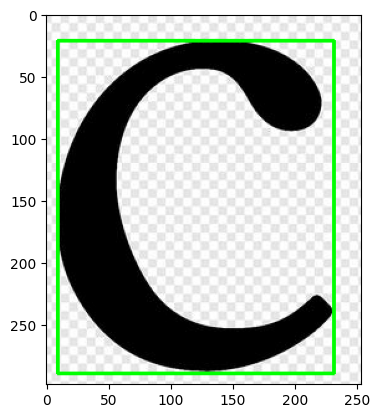

In [158]:
letter,image = get_letters("/kaggle/input/tes-huruf/c.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)